<a href="https://colab.research.google.com/github/akshayvr-programmer/ANN_fake_reg.csv/blob/main/Digitsclassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install anaconda


  Preparing metadata (setup.py) ... done
  Created wheel for anaconda: filename=anaconda-0.0.1.1-py3-none-any.whl size=1093 sha256=cae6db8bb72b2497db43a1dd83102d4a4dfb2122e5b14cf4f6ddc8ef6d34d0c3
  Stored in directory: /root/.cache/pip/wheels/4f/6e/40/8172063c425c01477a87d8d87e2d9afc7e52790aeea0ed5f33
Successfully built anaconda


In [2]:
!pip install tensorflow


In [3]:
!pip install opencv-python

In [1]:
import tensorflow as tf


In [2]:
mnist = tf.keras.datasets.mnist


In [3]:
(x_train, y_train) , (x_test, y_test) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [8]:
x_train.shape

(60000, 28, 28)

In [9]:
x_test.shape

(10000, 28, 28)

In [10]:
y_train.shape

(60000,)

In [11]:
y_test.shape

(10000,)

In [4]:
import matplotlib.pyplot as plt


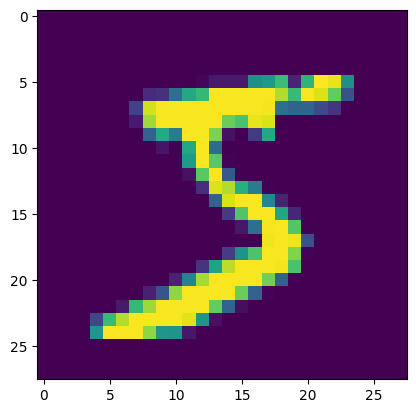

In [6]:
plt.imshow(x_train[0])
plt.show()


In [7]:
print(x_train[0])


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

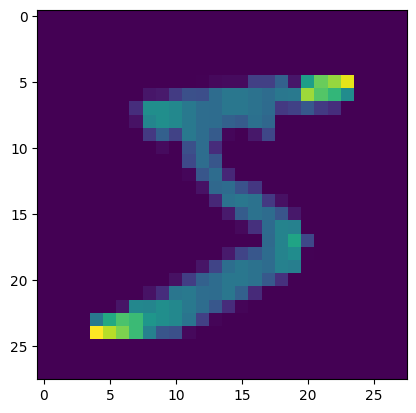

In [16]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

plt.imshow(x_train[0])


In [9]:
print(x_train[0])


[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [10]:
print(y_train[0])


5


In [17]:
import numpy as np
IMG_SIZE = 28

x_trainr = np.array(x_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_trainr = np.array(x_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)


In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D


In [19]:
model = Sequential()

#1st convolution layer
model.add(Conv2D(64, (3,3), input_shape = x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#2nd convolution layer

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

# 3rd convolution layer

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten

model.add(Flatten())
model.add(Dense(64))

model.add(Activation("relu"))

#fully connected layer

model.add(Dense(32))
model.add(Activation("relu"))

## Last fully connected layer

model.add(Dense(10))
model.add(Activation("softmax"))






/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
print(len(x_trainr))


60000


In [20]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


In [22]:
model.fit(x_trainr, y_trainr, epochs=5, validation_split=0.3)


Epoch 1/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 64s 48ms/step - accuracy: 0.9454 - loss: 0.1825 - val_accuracy: 0.9684 - val_loss: 0.1030
Epoch 2/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 59s 45ms/step - accuracy: 0.9720 - loss: 0.0926 - val_accuracy: 0.9762 - val_loss: 0.0772
Epoch 3/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 58s 44ms/step - accuracy: 0.9794 - loss: 0.0672 - val_accuracy: 0.9694 - val_loss: 0.1035
Epoch 4/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 83s 45ms/step - accuracy: 0.9837 - loss: 0.0499 - val_accuracy: 0.9794 - val_loss: 0.0674
Epoch 5/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 64s 49ms/step - accuracy: 0.9883 - loss: 0.0370 - val_accuracy: 0.9815 - val_loss: 0.0578


In [28]:
test_loss, test_accuracy = model.evaluate(x_testr, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9840 - loss: 0.0609


In [26]:
x_testr = np.array(x_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [29]:
predictions = model.predict([x_testr])


 12/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step

/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_137
Received: inputs=('Tensor(shape=(32, 28, 28, 1))',)
  warnings.warn(msg)


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_137
Received: inputs=('Tensor(shape=(None, 28, 28, 1))',)
  warnings.warn(msg)


In [30]:
print(np.argmax(predictions[0]))


7


In [32]:
import cv2


In [33]:
img = cv2.imread('eight.png')


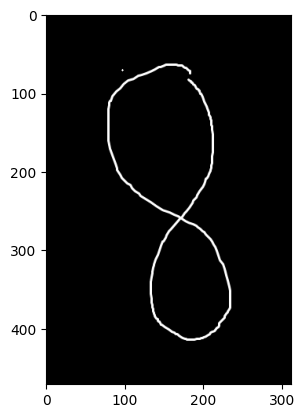

In [34]:
plt.imshow(img)


In [38]:
resized = cv2.resize(gray, (28,28), interpolation=cv2.INTER_AREA)

In [39]:
resized.shape


(28, 28)

In [40]:
newimg = tf.keras.utils.normalize(resized, axis=1)


In [41]:
newimg = np.array(newimg).reshape(-1, IMG_SIZE, IMG_SIZE, 1)


In [42]:
predictions = model.predict(newimg)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


In [43]:
print(np.argmax(predictions))


8
